# Multimedia Project --
## Retrieving Frames

In [255]:
from perceptual.filterbank import *
import ffmpeg
import cv2
import numpy as np
import pandas as pd
import colorsys
import matplotlib.pyplot as plt

# determine what OpenCV version we are using
try:
    import cv2.cv as cv
    USE_CV2 = True
    print("yes")
except ImportError:
    # OpenCV 3.x does not have cv2.cv submodule
    USE_CV2 = False
    
import sys
from skimage import color
from skimage import io
from cvtools import ipynb_show_cv2_image
from cvtools import ipynb_show_matrix
from cvtools import VideoReader

In [256]:
def yiq_to_rgb_new(y, i, q):
    r = y + 0.948262*i + 0.624013*q
    g = y - 0.276066*i - 0.639810*q
    b = y - 1.105450*i + 1.729860*q

    return (r, g, b)

In [ ]:
# import datetime
# from cvtools import ipynb_show_cv2_image
# from cvtools import VideoReader

# vidFname = 'nba.mp4'

# video_reader = VideoReader()

# video_reader.open(vidFname)


# # Video duration (in seconds).
# video_duration = float(
#     video_reader.get_number_of_frames()) / float(video_reader.get_frame_rate())

# print('resolution: %d x %d' % (video_reader.get_width(), video_reader.get_height()))
# print('number of frames: %d' % video_reader.get_number_of_frames())
# print('duration: %s' % datetime.timedelta(seconds=video_duration))


In [ ]:
# # Re-open the video to now process it from the start.
# video_reader = VideoReader()
# video_reader.open(vidFname)

# # Read a number of video frames (say, the first 10 seconds).
# video_fps = video_reader.get_frame_rate()
# print(video_fps)
# sampling_period = int(1.0 * video_fps)  # One every 3 seconds.
# stop_at = int(20.0 * video_fps)  # For the first 10 seconds.
# plt.clf()
# %matplotlib inline

# for frame in video_reader.get_frames():
#   index = video_reader.get_current_frame_index()
#   if 0 != index % sampling_period:
#     continue
#   ipynb_show_cv2_image(frame, 'frame %d' % index)
#   if index > stop_at:
#     break

In [ ]:
from cvtools import ipynb_show_cv2_image
from cvtools import ipynb_show_matrix

image = cv2.imread('frames/frame0.jpg')
print(np.shape(image))

image_modified = image.copy()
print(np.shape(image_modified))

cv2.rectangle(image_modified, (160, 420), (285, 455), (0, 0, 255))
cv2.rectangle(image_modified, (310, 420), (430, 455), (0, 255, 0))
plt.clf()
ipynb_show_cv2_image(image_modified, figsize=(10, 10))  
plt.show()


In [ ]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist

channel_index=0

error = np.abs(
        red0[:,:,channel_index] - red1[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        red0[:,:,channel_index] - red2[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        red100[:,:,channel_index] - red0[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

######@# blue
print("blue:")
error = np.abs(
        blue0[:,:,channel_index] - blue1[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        blue0[:,:,channel_index] - blue2[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)
ipynb_show_matrix(error, title)

error = np.abs(
        blue100[:,:,channel_index] - blue0[:,:,channel_index])

title = 'error in channel #%d (min: %d, avg: %.1f, max: %d)' % (
    channel_index,np.min(error), np.average(error), np.max(error))
print(title)


### New

In [258]:
def crop_img_to_grey(image_modified):
    cropRedImg = image_modified[424:444,258:284]
    cropBlueImg = image_modified[424:444,400:429]
#     ipynb_show_cv2_image(cropRedImg, figsize=(5, 5)) 
#     ipynb_show_cv2_image(cropBlueImg, figsize=(5, 5)) 
    Img_Red = color.rgb2gray(cropRedImg)
    Img_Blue = color.rgb2gray(cropBlueImg)
    return Img_Red,Img_Blue

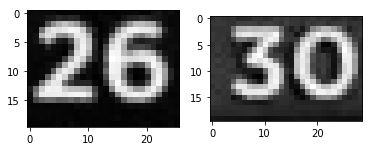

In [257]:
image1 = cv2.imread('frames/frame2.jpg')
red0,blue0 = crop_img_to_grey(image1)
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red0,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue0,cmap='gray')
plt.show()

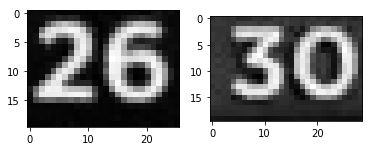

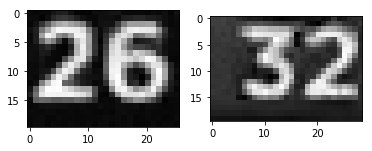

In [194]:
image1 = cv2.imread('frames/frame2.jpg')
image2 = cv2.imread('frames/frame12.jpg')

# red0,blue0 = crop_img_to_grey(image_modified)
red1,blue1 = crop_img_to_grey(image1)
red2,blue2 = crop_img_to_grey(image2)
# plt.figure()
# plt.clf()
# plt.subplot(1, 2, 1)
# plt.imshow(red0,cmap = 'gray')
# plt.subplot(1, 2, 2)
# plt.imshow(blue0,cmap='gray')
# plt.show()

plt.figure()
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red1,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue1,cmap='gray')
plt.show()

plt.figure()
plt.clf()
plt.subplot(1, 2, 1)
plt.imshow(red2,cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(blue2,cmap='gray')
plt.show()



# red100,blue100 = crop_img(cv2.imread('frames/frame251.jpg'))

In [195]:
#abs test
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
goal = []
prev = 0
curr = 1
for i in np.arange(3,40):
    if prev == 0:
        prev = i-1
        curr = i
#     image1 = cv2.imread('frames/frame'+str(prev)+'.jpg')
#     image2 = cv2.imread('frames/frame'+str(curr)+'.jpg')
    image1 = cv2.imread('frames/frame'+str(i-1)+'.jpg')
    image2 = cv2.imread('frames/frame'+str(i)+'.jpg')
    red0,blue0 = crop_img_to_grey(image1)
    red1,blue1 = crop_img_to_grey(image2)
# red2,blue2 = crop_img_to_grey(image2)

#     error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
#     error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
    error_Red01 = np.sum(np.abs(red0-red1))
    error_Blue01 = np.sum(np.abs(blue0-blue1))
    print('error in grayscale: Red:%.3f , Blue:%.3f'%(error_Red01,error_Blue01))
    if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
        prev = i
        curr +=1
        goal.append(i)
        
    else:
        curr+=1

print(goal)




error in grayscale: Red:3.511 , Blue:5.141
error in grayscale: Red:13.596 , Blue:13.943
error in grayscale: Red:4.889 , Blue:6.193
error in grayscale: Red:2.812 , Blue:3.521
error in grayscale: Red:4.336 , Blue:3.833
error in grayscale: Red:12.788 , Blue:13.626
error in grayscale: Red:2.096 , Blue:3.026
error in grayscale: Red:3.558 , Blue:2.617
error in grayscale: Red:4.172 , Blue:19.092
error in grayscale: Red:14.378 , Blue:66.548
error in grayscale: Red:6.073 , Blue:7.844
error in grayscale: Red:5.509 , Blue:7.702
error in grayscale: Red:5.482 , Blue:5.680
error in grayscale: Red:5.844 , Blue:6.629
error in grayscale: Red:16.759 , Blue:15.403
error in grayscale: Red:5.759 , Blue:4.994
error in grayscale: Red:5.166 , Blue:5.954
error in grayscale: Red:4.509 , Blue:4.834
error in grayscale: Red:14.119 , Blue:15.227
error in grayscale: Red:4.905 , Blue:5.431
error in grayscale: Red:6.167 , Blue:7.020
error in grayscale: Red:2.558 , Blue:5.149
error in grayscale: Red:14.658 , Blue:14.46

In [ ]:
# #abs test
# # read vedio and process the img at the same time
# # Simple dissimilarity is applied here image-image (pixel by pixel)

# vidFname = 'nba.mp4'

# vidReader = cv2.VideoCapture(vidFname)
# vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
# fps = vidReader.get(cv2.CAP_PROP_FPS)
# print(vidFrames,fps)
# #49485 = 35* 23* 60
# success,image = vidReader.read()
# #(480, 852, 3)

# red0,blue0 = crop_img_to_grey(image)

# # ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# # ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
# images_red = {}
# images_blue = {}
# errors_red = {}
# errors_blue = {}
# highlight = []
# count = 0
# while success:
#     # Extracting every 20 frames

#     for i in range(40):
#         success,image = vidReader.read()
    
#     success,image = vidReader.read()
    
#     #print('Read a new frame: ', success)
#     count += 1
    
#     if success == False:
#         print("break")
#         break
#     red1,blue1 = crop_img_to_grey(image)
    
#     error_Red01 = np.sum(np.abs(red0-red1))
#     error_Blue01 = np.sum(np.abs(blue0-blue1))
# #     if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
#     if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
#         red0 = red1
#         blue0 = blue1
#         count = count*40/fps
#         highlight.append(float(count))
#         images_red[count] = red1
#         images_blue[count] = blue1
#         errors_red[count] = error_Red01
#         errors_blue[count] = error_Blue01
        
# print("done")
# print(len(highlight))
# print(highlight)

In [196]:
#abs test
# read vedio and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

vidFname = 'nba.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidReader.set(cv2.CAP_PROP_FPS,1)
fps = vidReader.get(cv2.CAP_PROP_FPS)
print(fps)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
print(vidFrames,fps)
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []

count = 0
frame_count = 0
print(np.ceil(fps))
while success:
# for i in range(1000):
    # Extracting every 20 frames
    success,image = vidReader.read()
        
    if (frame_count % np.ceil(fps)) == 0:
#         print("%d second"%(i / np.ceil(fps)))
        try:
            red1,blue1 = crop_img_to_grey(image)
        except:
            print(success)
            print(i / np.ceil(fps))
        error_Red01 = np.sum(np.abs(red0-red1))
        error_Blue01 = np.sum(np.abs(blue0-blue1))
#         print(error_Red01,error_Blue01)
#         plt.subplot(1, 2, 1)
#         plt.imshow(red1,cmap = 'gray')
#         plt.subplot(1, 2, 2)
#         plt.imshow(blue1,cmap='gray')
#         plt.show()
        if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
            red0 = red1
            blue0 = blue1
            highlight.append(int(frame_count/np.ceil(fps)))
            images_red[count] = red1
            images_blue[count] = blue1
            errors_red[count] = error_Red01
            errors_blue[count] = error_Blue01
            count+=1
    frame_count+=1
print("done")
print(len(highlight))
print(highlight)

29.999155044555664
49485 29.999155044555664
30.0
done
31
[9, 21, 22, 257, 313, 360, 437, 438, 562, 659, 674, 712, 755, 787, 788, 814, 987, 1011, 1072, 1133, 1254, 1273, 1295, 1296, 1309, 1310, 1364, 1365, 1416, 1434, 1499]


9


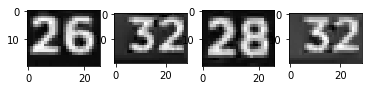

21 70.925327451 18.0532796078


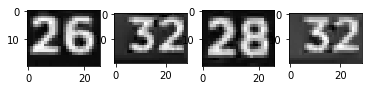

22 53.057452549 12.8287607843


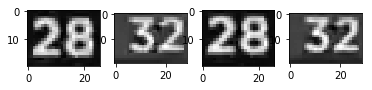

257 16.829227451 61.2014792157


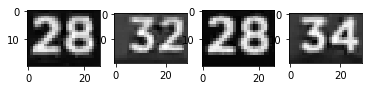

313 90.9146203922 18.1826188235


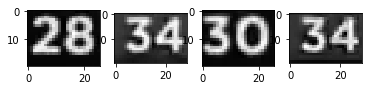

360 17.6118203922 65.0874870588


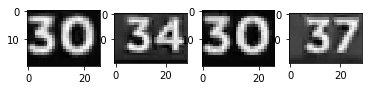

437 13.0819337255 93.4065196078


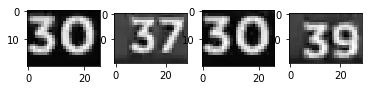

438 16.4660035294 91.0331015686


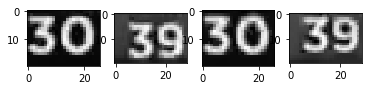

562 90.4757670588 15.6718647059


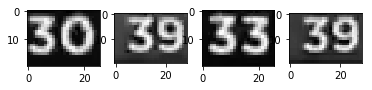

659 16.0526364706 67.2336952941


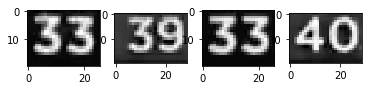

674 53.0129380392 14.4398203922


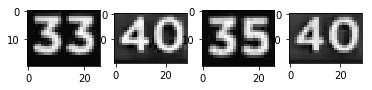

712 57.2880988235 10.9859105882


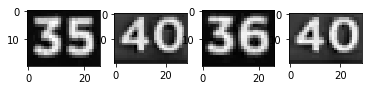

755 14.47136 71.0202933333


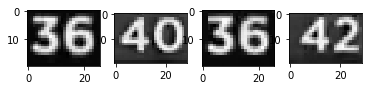

787 11.8058360784 78.1943121569


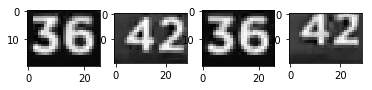

788 4.34823490196 70.8409376471


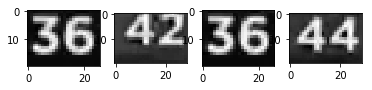

814 12.8090466667 68.2588937255


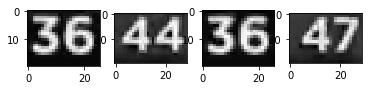

987 89.589094902 16.8520647059


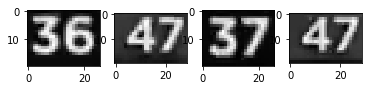

1011 38.2547023529 60.3304690196


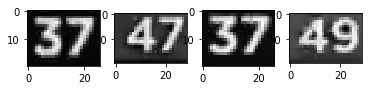

1072 72.7068968627 23.7817305882


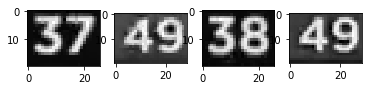

1133 15.5308529412 75.0549176471


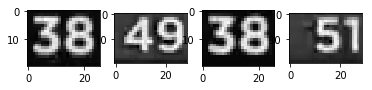

1254 99.7026305882 15.9384607843


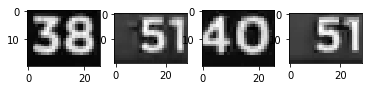

1273 97.183385098 13.579234902


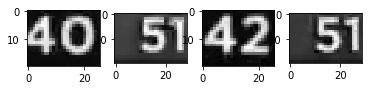

1295 99.7802898039 11.8284686275


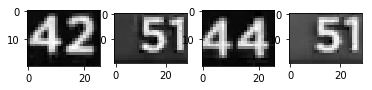

1296 53.0886054902 13.505827451


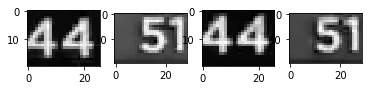

1309 15.5380490196 55.4663537255


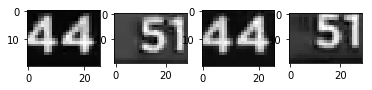

1310 5.44186156863 89.2248513725


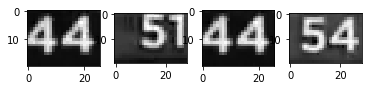

1364 11.8472431373 87.0661172549


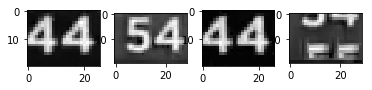

1365 13.5267572549 78.7172035294


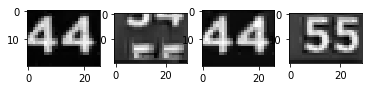

1416 15.6043384314 62.8295411765


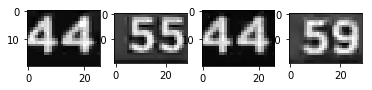

1434 15.6687243137 51.0539203922


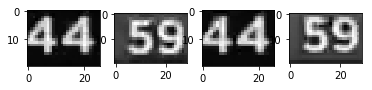

1499 66.4948380392 19.0949392157


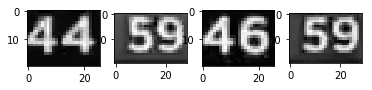

In [197]:
plt.clf()
for i in range(len(highlight)):
    if i ==0:
        print(highlight[i])
        red1 = images_red[i]
        blue1 = images_blue[i]
        red2 = images_red[i+1]
        blue2 = images_blue[i+1]
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()
    else:
        red1 = images_red[i-1]
        blue1 = images_blue[i-1]
        red2 = images_red[i]
        blue2 = images_blue[i]
        print(highlight[i],errors_red[i],errors_blue[i])
        plt.figure()
        plt.clf()
        plt.subplot(1, 4, 1)
        plt.imshow(red1,cmap = 'gray')
        plt.subplot(1, 4, 2)
        plt.imshow(blue1,cmap='gray')
        plt.subplot(1, 4, 3)
        plt.imshow(red2,cmap = 'gray')
        plt.subplot(1, 4, 4)
        plt.imshow(blue2,cmap='gray')
        plt.show()

In [198]:
highlight_1 = highlight.copy()
prev_time = 0
for time in highlight:
    if time - prev_time < 2:
        highlight_1.remove(time)
    prev_time = time    
        

print(len(highlight),len(highlight_1))

31 25


In [224]:
file_list = []
name_ = 'file '
with open('files.txt','w') as f:
    for idx,time in enumerate(highlight_1):
        start = str(time-10)
        end = str(time+3)
        if idx != len(highlight_1):
            file_name = name_+"'video/cut"+str(idx)+".mp4'\n"
        else:
            file_name = name_+"'video/cut"+str(idx)+".mp4'\n"
        f.write(str(file_name))
        


In [227]:
#!ffmpeg -ss 00:01:00 -i nba.mp4 -to 00:02:00 -c copy cut.mp4
import ffmpeg
import os
file_list = []
name_ = ' video2/cut'
for idx,time in enumerate(highlight_1):
    start = str(time-10)
    end = str(time+3)
    file_name = name_+str(idx)+'.mp4'
    command = "ffmpeg -i nba.mp4 -ss "+start+" -c copy -to "+end+ file_name
    print(command)
    os.system(command)



ffmpeg -i nba.mp4 -ss -1 -c copy -to 12 video/cut0.mp4
ffmpeg -i nba.mp4 -ss 11 -c copy -to 24 video/cut1.mp4
ffmpeg -i nba.mp4 -ss 247 -c copy -to 260 video/cut2.mp4
ffmpeg -i nba.mp4 -ss 303 -c copy -to 316 video/cut3.mp4
ffmpeg -i nba.mp4 -ss 350 -c copy -to 363 video/cut4.mp4
ffmpeg -i nba.mp4 -ss 427 -c copy -to 440 video/cut5.mp4
ffmpeg -i nba.mp4 -ss 552 -c copy -to 565 video/cut6.mp4
ffmpeg -i nba.mp4 -ss 649 -c copy -to 662 video/cut7.mp4
ffmpeg -i nba.mp4 -ss 664 -c copy -to 677 video/cut8.mp4
ffmpeg -i nba.mp4 -ss 702 -c copy -to 715 video/cut9.mp4
ffmpeg -i nba.mp4 -ss 745 -c copy -to 758 video/cut10.mp4
ffmpeg -i nba.mp4 -ss 777 -c copy -to 790 video/cut11.mp4
ffmpeg -i nba.mp4 -ss 804 -c copy -to 817 video/cut12.mp4
ffmpeg -i nba.mp4 -ss 977 -c copy -to 990 video/cut13.mp4
ffmpeg -i nba.mp4 -ss 1001 -c copy -to 1014 video/cut14.mp4
ffmpeg -i nba.mp4 -ss 1062 -c copy -to 1075 video/cut15.mp4
ffmpeg -i nba.mp4 -ss 1123 -c copy -to 1136 video/cut16.mp4
ffmpeg -i nba.mp4 -ss 

In [259]:
# ffmpeg -f concat -i textfile -c copy -fflags +genpts merged.mp4
# command_concat = 'cat video/cut0.mp4 video/cut1.mp4 > video/movie3.mp4'
command_concat = "ffmpeg -f concat -i files.txt -map 0 -fflags +genpts -c copy video/movie3.mp4"

os.system(command_concat)

0

In [246]:
#!ffmpeg -ss 00:01:00 -i nba.mp4 -to 00:02:00 -c copy cut.mp4
import ffmpeg
import os
file_list = []
name_ = ' video2/cut'
for idx,time in enumerate(highlight_1):
    start = str(time-10)
    end = str(time+3)
    file_name = name_+str(idx)+'.mp4'
    command = "ffmpeg -i nba.mp4 -ss "+start+" -c copy -to "+end+ file_name
#     command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss "+start+" -segment_time 13 -to "+end+" -segment_list video"+str(idx)+".ffcat -reset_timestamps 1 -v error chunk-%04d.mp4"
    print(command)
    os.system(command)







ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 1489 -c copy -to 1502 video2/cut24.mp4
ffmpeg -i nba.mp4 -ss 14

In [249]:
# command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss 50 -segment_time 13 -to 63 -segment_list video.ffcat -reset_timestamps 1 -v error chunk-%03d.mp4"
# command_concat_2 ="ffmpeg -fflags +genpts -i nba.mp4 -map 0 -c copy -f segment -segment_format mp4 -ss 20 -segment_time 13 -to 33 -segment_list video.ffcat -reset_timestamps 1 -v error chunk-%04d.mp4"
os.system(command_concat_2)
# ffmpeg -y -v error -i Test.ffcat -map 0 -c copy output.avi

0

In [ ]:
for i in np.arange(0,len(highlight)):
    if i ==0:
        continue
    red1 = images_red[highlight[i-1]]
    blue1 = images_blue[highlight[i-1]]
    red2 = images_red[highlight[i]]
    blue2 = images_blue[highlight[i]]
    print(highlight[i],errors_red[highlight[i]],errors_blue[highlight[i]])
    plt.figure()
    plt.clf()
    plt.subplot(1, 4, 1)
    plt.imshow(red1,cmap = 'gray')
    plt.subplot(1, 4, 2)
    plt.imshow(blue1,cmap='gray')
    plt.subplot(1, 4, 3)
    plt.imshow(red2,cmap = 'gray')
    plt.subplot(1, 4, 4)
    plt.imshow(blue2,cmap='gray')
    plt.show()

In [ ]:
import os

h=str(70)
h_i = str(230)
command = "ffmpeg -i nba.mp4 -ss "+h+" -c copy -to "+h_i+" cut.mp4"
os.system(command)
# command


In [ ]:
highlight2 = [23 ,30 ,35 ,40]

In [ ]:
#euclidian
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist
goal = []
prev = 0
curr = 1
for i in np.arange(3,40):
    if prev == 0:
        prev = i-1
        curr = i
    image1 = cv2.imread('frames/frame'+str(prev)+'.jpg')
    image2 = cv2.imread('frames/frame'+str(curr)+'.jpg')
#     print('i:%d'%i)
    red0,blue0 = crop_img_to_grey(image1)
    red1,blue1 = crop_img_to_grey(image2)
# red2,blue2 = crop_img_to_grey(image2)

    error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
    error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
    print('error in grayscale: Red:%.3f , Blue:%.3f'%(error_Red01,error_Blue01))
    if (error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
        prev = i
        curr +=1
        goal.append(i)
        
    else:
        curr+=1

print(goal)



In [ ]:
# read vedio and process the img at the same time
# Simple dissimilarity is applied here image-image (pixel by pixel)

vidFname = 'nba.mp4'

vidReader = cv2.VideoCapture(vidFname)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []
count = 0
while success:
    # Extracting every 20 frames

    for i in range(35):
        success,image = vidReader.read()
    
    success,image = vidReader.read()
    
    #print('Read a new frame: ', success)
    count += 1
    
    if success == False:
        print("break")
        break
    red1,blue1 = crop_img_to_grey(image)
    
    error_Red01 = np.sqrt(np.sum(np.square(red0-red1)))
    error_Blue01 = np.sqrt(np.sum(np.square(blue0-blue1)))
#     if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
    if ( (3< error_Red01 < 10) or (3<  error_Blue01 < 10) ) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
        red0 = red1
        blue0 = blue1
        highlight.append(count)
        images_red[count] = red1
        images_blue[count] = blue1
        errors_red[count] = error_Red01
        errors_blue[count] = error_Blue01
        
print("done")
print(len(highlight))
print(highlight)

In [ ]:
for i in np.arange(1,len(highlight)):
    red1 = images_red[highlight[i]]
    blue1 = images_blue[highlight[i]]
    red2 = images_red[highlight[i+1]]
    blue2 = images_blue[highlight[i+1]]
    print(errors_red[highlight[i]],errors_blue[highlight[i]])
    plt.figure()
    plt.clf()
    plt.subplot(1, 4, 1)
    plt.imshow(red1,cmap = 'gray')
    plt.subplot(1, 4, 2)
    plt.imshow(blue1,cmap='gray')
    plt.subplot(1, 4, 3)
    plt.imshow(red2,cmap = 'gray')
    plt.subplot(1, 4, 4)
    plt.imshow(blue2,cmap='gray')
    plt.show()

In [ ]:
vidFname = 'nba.mp4'
video_reader = VideoReader()
video_reader.open(vidFname)

# Read a number of video frames (say, the first 10 seconds).
video_fps = video_reader.get_frame_rate()
print(video_fps)
sampling_period = int(1 * video_fps)  # One every 3 seconds.
print(video_duration)
stop_at = int(video_duration * video_fps)  # For the first 10 seconds.
plt.clf()
%matplotlib inline


#(480, 852, 3)
vidReader = VideoCapture(vidFname)
vidFrames = int(vidReader.get(cv2.CAP_PROP_FRAME_COUNT))
#49485 = 35* 23* 60
success,image = vidReader.read()
#(480, 852, 3)

red0,blue0 = crop_img_to_grey(image)

# ipynb_show_cv2_image(red0, figsize=(5, 5)) 
# ipynb_show_cv2_image(blue0, figsize=(5, 5)) 
images_red = {}
images_blue = {}
errors_red = {}
errors_blue = {}
highlight = []

for frame in video_reader.get_frames():
    index = video_reader.get_current_frame_index()
    if 0 != index % int(sampling_period*1.3):
        continue
    
    red1,blue1 = crop_img_to_grey(frame)

    error_Red01 = np.sum(np.abs(red0-red1))
    error_Blue01 = np.sum(np.abs(blue0-blue1))
#    if ((error_Red01 > 3.0 and error_Red01 < 15 ) or ( error_Blue01 > 3.0 and error_Blue01 < 15)) and ((error_Red01 > 3.0 and error_Blue01 > 3.0)==0):
    if ( (50< error_Red01 < 130) or (50<  error_Blue01 < 130) ) and ((error_Red01 > 50.0 and error_Blue01 > 50.0)==0):
        
        red0 = red1
        blue0 = blue1
        count = index/video_fps
        #print(video_fps)
        print(index,count)
        ipynb_show_cv2_image(frame, 'frame %d' % count)
        highlight.append(count)
        images_red[count] = red1
        images_blue[count] = blue1
        errors_red[count] = error_Red01
        errors_blue[count] = error_Blue01
    
    if index > stop_at:
        break

    
print("done")
print(len(highlight))
print(highlight)
